# Building multiple classifier models to predict edible and non-edible mushrooms

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mushroom_df = pd.read_csv(r"C:\Users\soory\Desktop\001_Data\ML Portfolio Projects\Mushrooms dataset\mushroom.csv")

# Exploratory Data Analysis

In [4]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroom_df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
print("Shape of the dataset: ", mushroom_df.shape)

Shape of the dataset:  (8124, 23)


In [11]:
#Finding the unique values in the target class
mushroom_df["class"].unique()

array(['p', 'e'], dtype=object)

In [10]:
#Total Number of edible and poisonous mushrooms
mushroom_df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Text(0.5, 1.0, 'Number of edible and non-edible mushrooms')

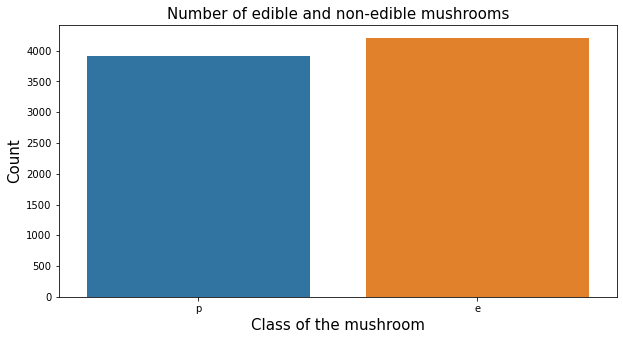

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x="class", data=mushroom_df)
plt.xlabel("Class of the mushroom", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Number of edible and non-edible mushrooms", fontsize=15)

# Pre-Processing and Partitioning Dataset

In [18]:
#Labelencoding all the columns, as all the columns are categorical type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
for columns in mushroom_df.columns:
    mushroom_df[columns] = le.fit_transform(mushroom_df[columns])

In [20]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [21]:
mushroom_df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [ ]:
#dropping "Veil-Type" as all the values are same
mushroom_df.drop("veil-type", axis=1, inplace=True)

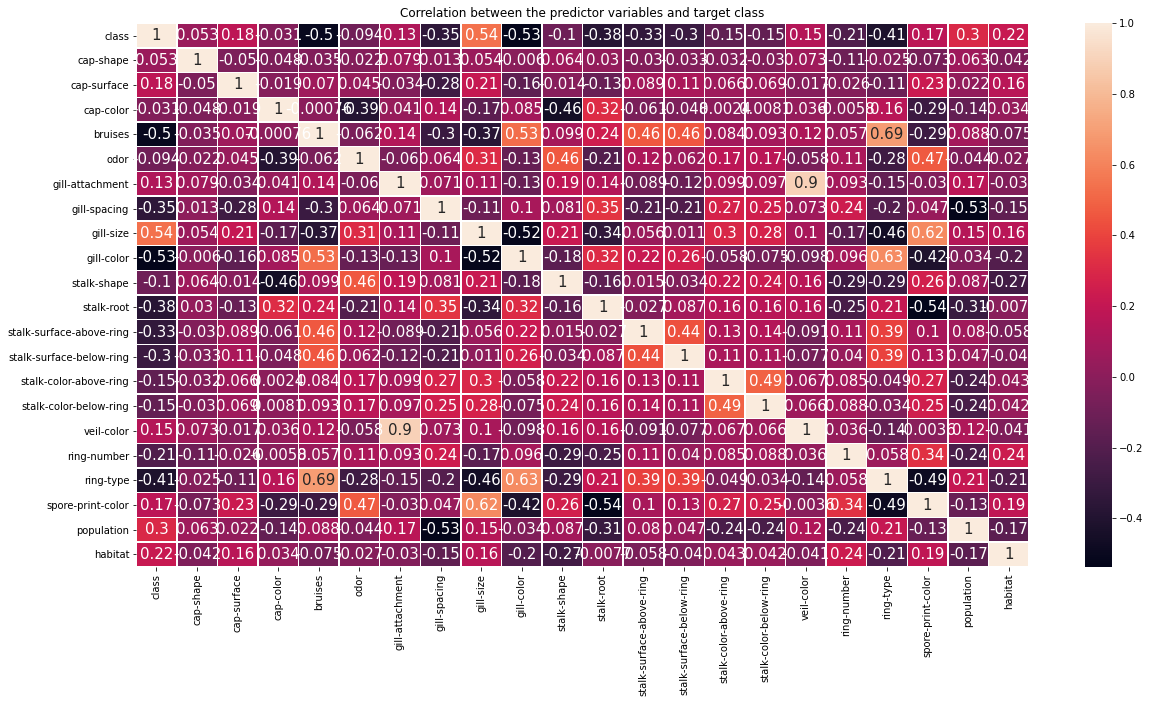

In [30]:
#Creating correlation matrix between predictor variables and target variables
plt.figure(figsize=(20,10))
plt.title("Correlation between the predictor variables and target class")
sns.heatmap(mushroom_df.corr(), linewidths=.5, annot=True, annot_kws={"size":15})
plt.yticks(rotation=0);

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X = mushroom_df.drop("class", axis=1)

In [34]:
y = mushroom_df["class"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Building machine learning models!

## 1) Logistic Regression Classification

In [36]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [37]:
LogReg.fit(X_train, y_train)

D:\Py_Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred_LogReg = LogReg.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [48]:
print("Logistic Regression's Accuracy: ", round((LogReg.score(X_test, y_test) * 100), 2),"%")
print("LogReg Model's Accuracy Score: ", accuracy_score(y_test, y_pred_LogReg))

Logistic Regression's Accuracy:  94.63 %
Model's Accuracy Score:  0.9462674323215751


In [49]:
print(classification_report(y_test, y_pred_LogReg))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1264
           1       0.95      0.93      0.94      1174

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

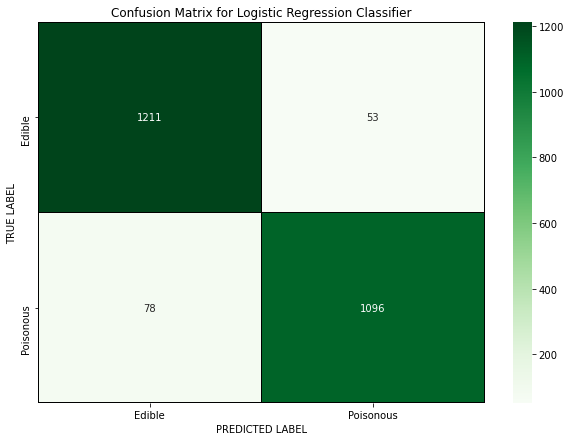

In [52]:
#Confusion Matrix of Logistic Regression model.
cm = confusion_matrix(y_test, y_pred_LogReg)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')

## 2) Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [54]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
y_pred_dTree = dTree.predict(X_test)

In [56]:
print("Decision Tree Classifier's Accuracy: ", round((dTree.score(X_test, y_test) * 100), 2),"%")
print("DTree Model's Accuracy Score: ", accuracy_score(y_test, y_pred_dTree))

Decision Tree Classifier's Accuracy:  100.0 %
DTree Model's Accuracy Score:  1.0


In [57]:
print(classification_report(y_test, y_pred_dTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1264
           1       1.00      1.00      1.00      1174

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

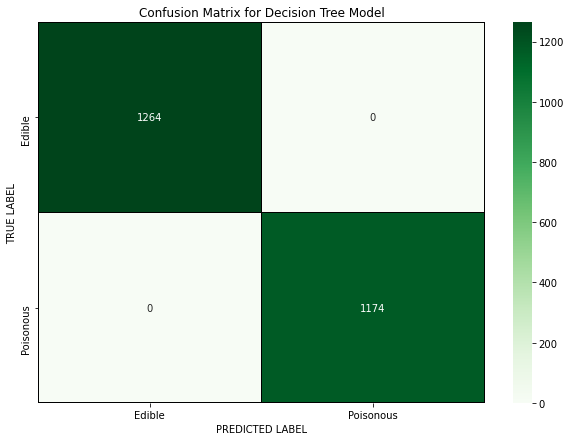

In [72]:
#Confusion Matrix of Decision Tree Classifier model.
cm = confusion_matrix(y_test, y_pred_dTree)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Model')

## 3) K-Nearest Neighbour Classifier

In [64]:
# Deciding the best K-Value for the model.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

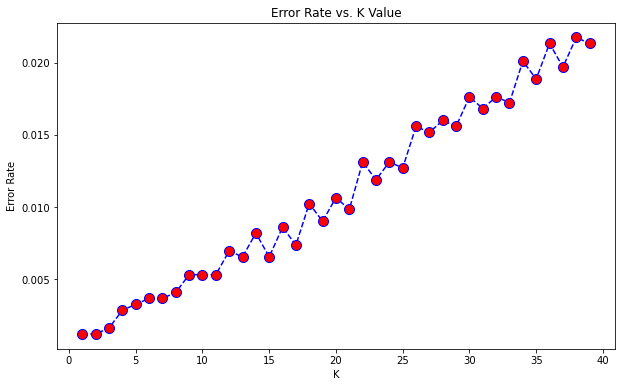

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [65]:
#Building the Knn model

In [66]:
knn = KNeighborsClassifier(n_neighbors=1)

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [68]:
y_pred_KNN = knn.predict(X_test)

In [80]:
print("KNN's Accuracy: ", round((knn.score(X_test, y_test) * 100), 2),"%")
print("KNN Model's Accuracy Score: ", accuracy_score(y_test, y_pred_KNN))

KNN's Accuracy:  99.88 %
KNN Model's Accuracy Score:  0.9987694831829368


In [81]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1264
           1       1.00      1.00      1.00      1174

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Text(0.5, 1.0, 'Confusion Matrix for KNN')

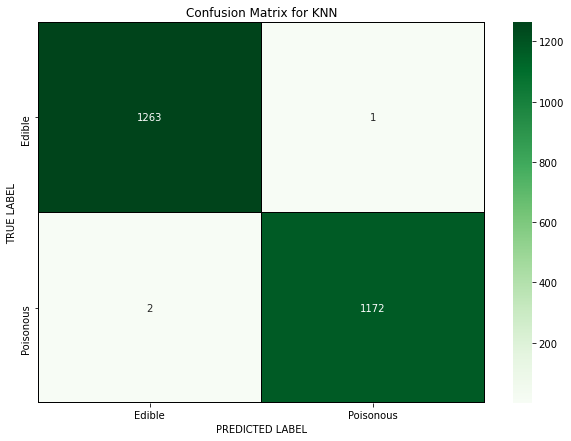

In [82]:
#Confusion Matrix of KNN.
cm = confusion_matrix(y_test, y_pred_KNN)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN')

# 4) SVC

In [75]:
from sklearn.svm import SVC
svc = SVC(gamma="auto")

In [76]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
y_pred_SVC = svc.predict(X_test)

In [84]:
print("SVC's Accuracy: ", round((svc.score(X_test, y_test) * 100), 2),"%")
print("SVC Model's Accuracy Score: ", accuracy_score(y_test, y_pred_SVC))

SVC's Accuracy:  100.0 %
SVC Model's Accuracy Score:  1.0


In [85]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1264
           1       1.00      1.00      1.00      1174

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Text(0.5, 1.0, 'Confusion Matrix for KNN')

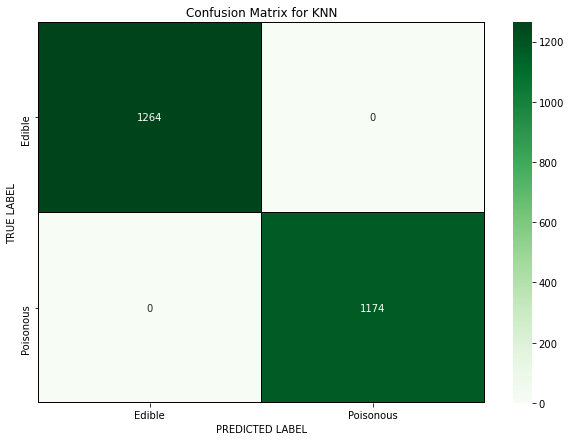

In [86]:
#Confusion Matrix of SVC.
cm = confusion_matrix(y_test, y_pred_SVC)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN')

# Conclusion

## Decision tree, KNN and SVC models performed very well on the mushroom dataset